### 多分类

In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline
dt = pd.read_csv("/Users/apple/Documents/Jupytor_Notebook/ai_programming/5.7/实验8降维回归和分类/dataset.csv")
tsne = manifold.TSNE(n_components=2,init='pca')

#### TSNE降维

In [2]:
dt1 = dt.iloc[:,1:-1].dropna()
pp = tsne.fit_transform(dt1.iloc[:,1:])

In [3]:
pre = pd.concat([pd.DataFrame(dt.iloc[:,0]),pd.DataFrame(pp)],axis=1)

In [4]:
pre.head()

,type,0,1
0,A,-61.606567,17.485302
1,C,38.730118,-4.364321
2,A,-52.470860,12.033561
3,C,40.298336,-0.266161
4,D,8.427659,4.081069


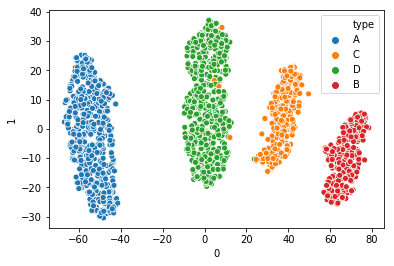

In [5]:
import seaborn as sns
sns.scatterplot(x=pre.iloc[:,1] , y=pre.iloc[:,2] , hue=pre.iloc[:,0])

#### sklearn自带PCA降维

In [7]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
x_p = pca.fit_transform(dt1)

In [8]:
tre = pd.concat([pd.DataFrame(dt.iloc[:,0]),pd.DataFrame(x_p)],axis=1)

In [9]:
tre.head()

,type,0,1
0,A,-3.782051,4.314092
1,C,4.574375,-0.940067
2,A,-5.047301,2.587624
3,C,4.462800,-0.685587
4,D,0.559821,0.296235


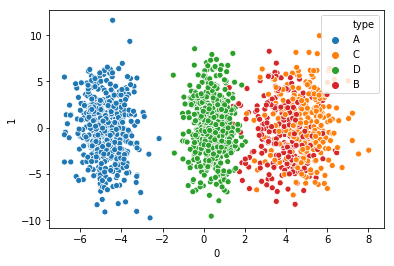

In [10]:
import seaborn as sns
sns.scatterplot(x=tre.iloc[:,1] , y=tre.iloc[:,2] , hue=pre.iloc[:,0])

#### k-pca 降维

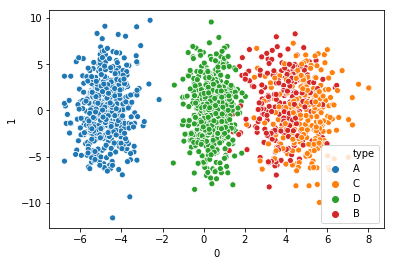

In [11]:
k_pca = decomposition.KernelPCA(n_components=2)
x_k = k_pca.fit_transform(dt1)
kre = pd.concat([pd.DataFrame(dt.iloc[:,0]),pd.DataFrame(x_k)],axis=1)
sns.scatterplot(x=kre.iloc[:,1] , y=kre.iloc[:,2] , hue=kre.iloc[:,0])

In [13]:
tre.head()

,type,0,1
0,A,-3.782051,4.314092
1,C,4.574375,-0.940067
2,A,-5.047301,2.587624
3,C,4.462800,-0.685587
4,D,0.559821,0.296235


**可见tsne效果最好**

### 分类

**SVC方法**

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 

clf = SVC(gamma='auto')

pre = pre.replace('A',0)
pre = pre.replace('B',1)
pre = pre.replace('C',2)
pre = pre.replace('D',3)

x_train, x_test, y_train, y_test = train_test_split(pre.iloc[:,1:], pre.iloc[:,0], test_size = 0.1, random_state = 1)
cl = clf.fit(x_train, y_train) 

In [15]:
cl.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)>

In [16]:
cl.score(x_train, y_train)

0.9985185185185185

In [17]:
cl.score(x_test , y_test)

0.9866666666666667